In [5]:
#导入工具库
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from os import listdir

In [6]:
def img2vector(filename):
    file = open(filename)
    ret = np.zeros([1024], dtype=int)
    for i in range(32):
        line = file.readline()
        for j in range(32):
            ret[i*32+j] = int(line[j])
    return ret

In [7]:
def readDataSet(path):
    filelist = listdir(path)
    n_file = len(filelist)
    dataset = np.zeros([n_file, 1024], dtype=int)
    labels = np.zeros([n_file], dtype=int)
    for i, file in enumerate(filelist):
        file_name_spilted = file.split('.')[0].split('_')
        num = int(file_name_spilted[0])
        labels[i] = num
        dataset[i] = img2vector(path + '/' + file)
    return dataset, labels

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
train_data, train_labels = readDataSet('trainingDigits')
knn.fit(train_data, train_labels)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [11]:
test_data, test_labels = readDataSet('testDigits')
acc = knn.score(test_data, test_labels)
print(acc)

0.9883720930232558


In [12]:
result = knn.predict(test_data)
# print(result)
error_count = np.sum(result != test_labels)
count = len(test_labels)
print(f'错误数目: {error_count} , 总数目: {count} , 错误率: {error_count/count}')

错误数目: 11 , 总数目: 946 , 错误率: 0.011627906976744186


In [13]:
# 导入绘图和评估库
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.font_manager as fm

# 打印每个数字的样本数量
print("测试集中各数字的样本数量:")
for i in range(0,10):
    print(f'数字 {i} 的个数: {np.sum(test_labels==i)}')

print("每行代表一个样本，每列代表该样本属于对应数字(0-9)的概率")

测试集中各数字的样本数量:
数字 0 的个数: 87
数字 1 的个数: 97
数字 2 的个数: 92
数字 3 的个数: 85
数字 4 的个数: 114
数字 5 的个数: 108
数字 6 的个数: 87
数字 7 的个数: 96
数字 8 的个数: 91
数字 9 的个数: 89
每行代表一个样本，每列代表该样本属于对应数字(0-9)的概率


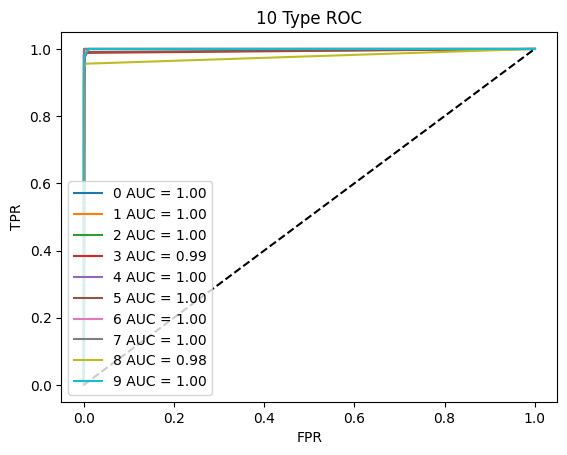

In [14]:

# 获取预测概率
y_pred = knn.predict_proba(test_data)

y_binary = label_binarize(test_labels, classes=range(10))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_binary[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{i} AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("10 Type ROC")
plt.legend(loc="lower left")  # 放左下角
